In [2]:
from gensim.models import Word2Vec, KeyedVectors
from gensim.models.word2vec import Text8Corpus
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib

In [3]:
corpus = Text8Corpus('./ja.text8')
model_text8 = Word2Vec(sentences=corpus, vector_size=100, window=5, min_count=1, workers=4)

In [4]:
word = "東京"
vector = model_text8.wv[word]
print(f"Word vector for '{word}':\n{vector}")

word1 = "東京"
word2 = "神奈川"
similarity = model_text8.wv.similarity(word1, word2)
print(f"Word similarity for '{word1} and {word2}':\n{similarity}")

similar_words = model_text8.wv.most_similar(word, topn=10)
print(f"Top 10 words similar to '{word}':")
for similar_word, similarity in similar_words:
  print(f"{similar_word}: {similarity}")

Word vector for '東京':
[-2.7754223  -0.22318055  0.56239456  2.655481   -1.2037097   2.8732631
  3.42398     0.47923243 -2.2526598   3.0229313  -2.8127947  -1.5911996
 -1.5519451  -1.8094283  -0.80323726  3.1303656  -1.8811992  -0.39804137
 -0.09054983  1.1495271  -5.9367657   1.9387817   1.2526163  -1.7350742
 -0.27020633  1.9017807   0.08032762  2.484048   -1.438829    0.7142001
 -0.30620944 -0.72149205 -3.4533336   0.9181639  -1.2763602  -0.8946159
 -0.86765116  1.0319583   0.83480227 -0.09648757 -2.4732041  -2.2346742
  3.0827858  -0.528243   -0.28795123 -0.50475436  0.9696703  -0.6053942
  0.704898    4.1100316   0.8445666  -0.0199416   0.32509065  2.8829288
 -1.1673931  -0.9231746   1.3620753   2.2605906   0.52197886  0.53976804
 -1.8428904  -0.98646605  2.3531642   0.19579329 -1.1662006   2.968263
 -1.1502709   3.8628852   2.6902533  -3.3310163   0.33382612  1.1048403
  3.3582776  -1.7067417   3.1940725   2.2048414  -3.625808    0.8494893
  2.4238858   1.347025   -0.37052009  2.0

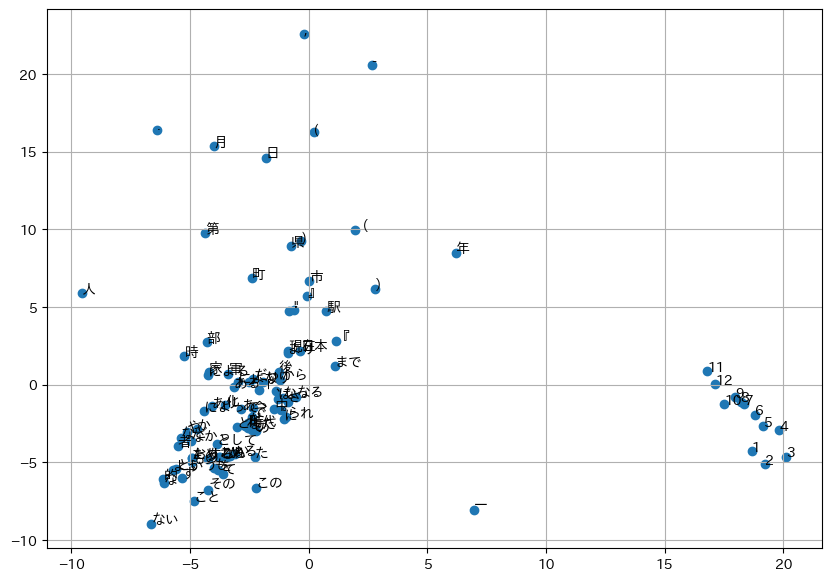

In [5]:
words = list(model_text8.wv.index_to_key)[:100]

word_vectors = []
for word in words:
  word_vectors.append(model_text8.wv[word])  

pca = PCA(n_components=2)
result = pca.fit_transform(word_vectors)

plt.figure(figsize=(10, 7))
plt.scatter(result[:, 0], result[:, 1])

for i, word in enumerate(words):
  plt.annotate(word, xy=(result[i, 0], result[i, 1]))

plt.grid()
plt.show()

In [11]:
results = model_text8.wv.most_similar(positive=["フランス", "東京"], negative=["日本"])

for result in results:
  print(result)

('パリ', 0.6397820711135864)
('ロンドン', 0.6203171610832214)
('ウィーン', 0.6137204170227051)
('ベルリン', 0.5846760869026184)
('モスクワ', 0.5752580761909485)
('オーストリア', 0.5549944043159485)
('ハンガリー', 0.5324992537498474)
('ミュンヘン', 0.53055739402771)
('ミラノ', 0.5298606753349304)
('ニューヨーク', 0.5252054929733276)


In [7]:
model_chive = KeyedVectors.load("./chive-1.3-mc90.kv")

In [8]:
word = "東京"
vector = model_chive[word]
print(f"Word vector for '{word}':\n{vector}")

word1 = "東京"
word2 = "神奈川"
similarity = model_chive.similarity(word1, word2)
print(f"Word similarity for '{word1} and {word2}':\n{similarity}")

similar_words = model_chive.most_similar(word, topn=10)
print(f"Top 10 words similar to '{word}':")
for similar_word, similarity in similar_words:
  print(f"{similar_word}: {similarity}")

Word vector for '東京':
[ 0.0344494   0.30866903  0.39025226  0.05224727 -0.04730398  0.09166868
  0.09877509 -0.25373158 -0.06944488  0.2863468   0.14062947 -0.01888627
  0.14472397  0.03196093 -0.11655973  0.21705034  0.09880491 -0.02026572
 -0.1465599  -0.21050113  0.08284777  0.08148597 -0.1326505  -0.11843117
 -0.00492783 -0.30604738  0.08206327  0.11414479  0.04534557 -0.1160261
  0.0781585   0.15522158  0.13503695  0.04953204  0.03076172  0.00122027
 -0.07628236 -0.19826968  0.2717369  -0.15610118 -0.27554536  0.03423405
 -0.04879209  0.36025962 -0.03428946 -0.36916366  0.02389197  0.02183556
  0.06597114 -0.20657061 -0.11822502  0.03434118 -0.10610773 -0.03933438
 -0.02211881 -0.28380984 -0.37322953  0.11516481 -0.07852454 -0.08405983
  0.16950038 -0.26074594  0.13201687  0.04341868 -0.07084348 -0.08061425
 -0.01534502 -0.05774179  0.04312001  0.06656778 -0.13865748 -0.04452733
  0.36440322 -0.234105   -0.2363982  -0.03267636 -0.2940757   0.11717491
  0.02147578 -0.23400126  0.04

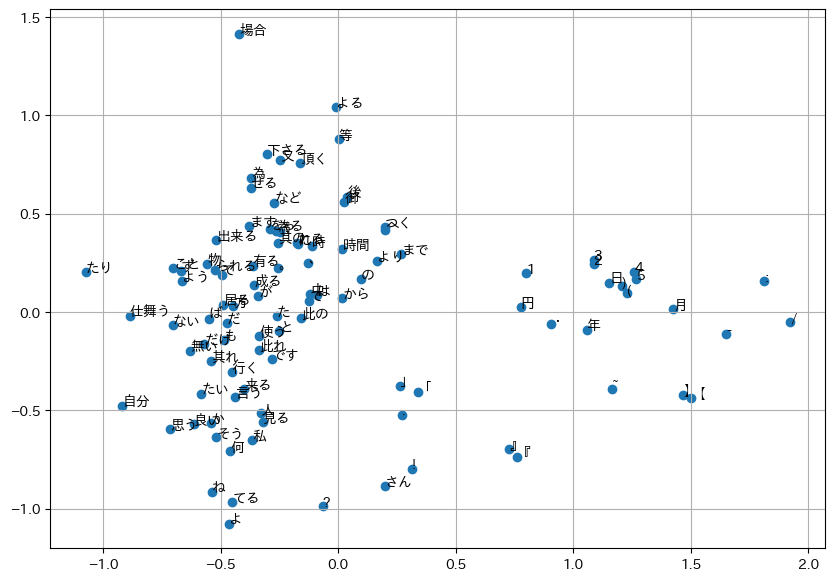

In [9]:
words = list(model_chive.index_to_key)[:100]

word_vectors = []
for word in words:
  word_vectors.append(np.array(model_chive[word]))

pca = PCA(n_components=2)
result = pca.fit_transform(word_vectors)

plt.figure(figsize=(10, 7))
plt.scatter(result[:, 0], result[:, 1])

for i, word in enumerate(words):
  plt.annotate(word, xy=(result[i, 0], result[i, 1]))

plt.grid()
plt.show()